In [ ]:
#ke
- https://www.kaggle.com/sudalairajkumar/simple-exploration-baseline-santander-value

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import preprocessing, model_selection, metrics


In [4]:
train_df = pd.read_csv('train.csv') # sample(n, axis) ランダムにサンプリング
test_df = pd.read_csv('test.csv')

print("train_shape:{}".format(train_df.shape))
print("test_shape:{}".format(test_df.shape))

train_shape:(4459, 4993)
test_shape:(49342, 4992)


In [12]:
train_df.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


/Users/kyohei/.pyenv/versions/3.5.3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


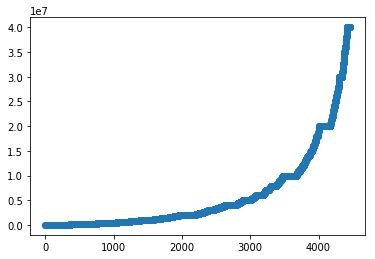

In [6]:
plt.figure() # figsize 8×6 inch
plt.scatter(range(train_df.shape[0]),np.sort(train_df['target'].values))
plt.show()

/Users/kyohei/.pyenv/versions/3.5.3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


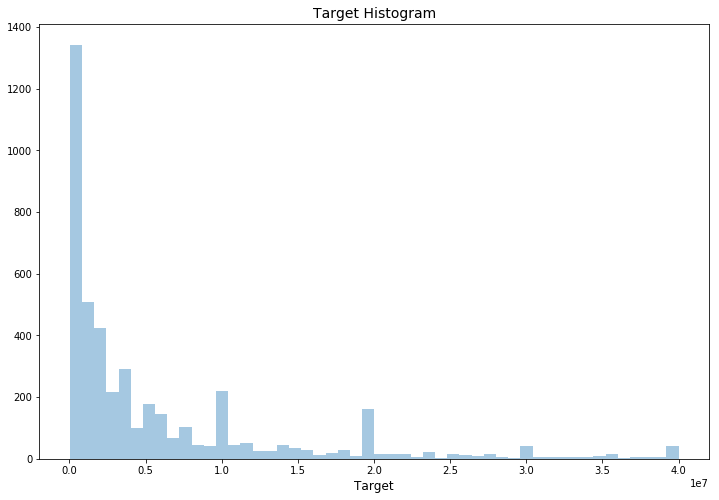

In [13]:
plt.figure(figsize=(12,8))
sns.distplot(train_df["target"].values, bins=50, kde=False)
plt.xlabel('Target', fontsize=12)
plt.title("Target Histogram", fontsize=14)
plt.show()

In [65]:
# axis = 列：0　行：1 


In [66]:
zero_ration_df = pd.DataFrame({'Percentile':((train_df.values)==0).mean(axis=0)},
                               index=train_df.columns.tolist())

In [51]:
zero_ration_df_fix = zero_ration_df.drop(['ID','target'], axis=0).reset_index()

In [57]:
zero_ration_df_fix.loc[(zero_ration_df_fix['Percentile'] != 0), 'Percentile'].min()

0.6490244449428123